## 一、赛题描述

随着城市化步伐的加速迈进，城市治理面临着前所未有的挑战与机遇。城市管理的精细化、智能化已成为全球城市追求卓越的关键路径。然而，机动车违停、非机动车违停、占道经营等城市违规行为如同现代都市肌体上的疮疤，不仅侵蚀着城市的美学与秩序，更对公众福祉构成了潜在威胁。传统的人力巡查与被动响应模式，已然无法匹配当今城市治理的需求。

本赛题最终目标是开发一套智能识别系统，能够自动检测和分类城市管理中的违规行为。该系统应利用先进的图像处理和计算机视觉技术，通过对摄像头捕获的视频进行分析，自动准确识别违规行为，并及时向管理部门发出告警，以实现更高效的城市管理。

## 二、赛题题目

城市管理违规行为智能识别

## 三、赛题任务

- 【初赛】

初赛任务是根据给定的城管视频监控数据集，进行城市违规行为的检测。违规行为主要包括垃圾桶满溢、机动车违停、非机动车违停等。

选手需要能够从视频中分析并标记出违规行为，提供违规行为发生的时间和位置信息。

- 【初赛审核】

阶段时间：9月13日-9月19日 前24名晋级复赛，如出现违规行为，则顺延晋级，由组委会确认晋级名单。

- 【复赛】

复赛任务是根据给定的城管视频监控数据集，进行城市违规行为的检测。违规行为主要包括违法经营、垃圾桶满溢、机动车违停、非机动车违停等。

选手需要基于大赛提供的复赛环境，进行复赛模型构建与预测，同时复赛数据集对选手不可见。

- 【复赛审核】

阶段时间：9月18日-9月30日 前12名晋级决赛，如出现违规行为，则顺延晋级，由组委会确认晋级名单。

- 【决赛】

具体时间待定，决赛阶段采用线下或者线上答辩的方式（待定），晋级决赛队伍需要提前准备答辩PPT及相关支撑材料，评委将根据选手的初复赛及答辩表现进行综合评分，决定最终排名。

## 四、数据描述

- **【初赛】**

初赛提供城管视频监控数据与对应违规行为标注。违规行为包括垃圾桶满溢、机动车违停、非机动车违停等。

视频数据为mp4格式，标注文件为json格式，每个视频对应一个json文件。

json文件的内容是每帧检测到的违规行为，包括以下字段：

- frame_id：违规行为出现的帧编号
- event_id：违规行为ID
- category：违规行为类别
- bbox：检测到的违规行为矩形框的坐标，[xmin,ymin,xmax,ymax]形式

标注示例如下：

```
[
  {
   "frame_id": 20,
   "event_id": 1,
   "category": "机动车违停",
   "bbox": [200, 300, 280, 400]
  },
  {
   "frame_id": 20,
   "event_id": 2,
   "category": "机动车违停",
   "bbox": [600, 500, 720, 560]
  },
  {
   "frame_id": 30,
   "event_id": 3,
   "category": "垃圾桶满溢",
   "bbox": [400, 500, 600, 660]
  }
 ]
```


违规行为示例如下：


![img](https://file.public.marsbigdata.com/2024/08/14/f0gScKCpVXIJCRBJ.png)

垃圾桶满溢

![img](https://file.public.marsbigdata.com/2024/08/14/6ihe6W8nDp_ZqUNX.png)

机动车违停

![img](https://file.public.marsbigdata.com/2024/08/14/1kkQ9vrT8bZTEBVN.png)

非机动车违停

- **【复赛】**

复赛提供城管视频监控数据与对应违规行为标注。违规行为包括违法经营、垃圾桶满溢、机动车违停、非机动车违停等。

数据与初赛数据格式相同，新增违法经营类别，行为示例如下：

![img](https://file.public.marsbigdata.com/2024/08/14/rksAIZHbVMj-3PAg.png)

违法经营


## 五、评估指标

- **【初赛】**

使用F1score、MOTA指标来评估模型预测结果。


![img](https://file.public.marsbigdata.com/2024/08/14/1-2m0dPNpL-IX5au.png)

对每个json文件得到两个指标的加权求和，最终得分为所有文件得分取均值。

注1：若真实目标框与预测框IOU大于0.5，则判定目标正确识别。若MOTA指标为负，则该类别精度得分为0。

注2：若该视频中没有某个类别的目标，则此类别计算均值时，忽略该视频。

- **【****复****赛】**

复赛需同时评估模型的准确度与效率。

模型准确率评估指标与初赛一致，使用F1score、MOTA进行评估。

模型效率使用FPS（每秒钟能够处理的帧数）等进行评估。

## 六、提交说明

- 【初赛】**

选手需要生成result文件夹，文件夹中包含每个视频对应的json结果文件，文件名与视频名对应。选手需要将文件夹打包成result.zip进行上传。

json文件中包含了检测到的违规行为列表，若未检测到违规行为，则列表为空。

每个违规行为包含的字段如下：

- frame_id：违规行为出现的帧编号
- event_id：违规行为ID
- category：违规行为类别
- bbox：检测到的违规行为矩形框的坐标，[xmin,ymin,xmax,ymax]形式
- confidence：置信度

提交的json示例如下：

```
[
  {
   "frame_id": 20,
   "event_id": 1,
   "category": "机动车违停",
   "bbox": [200, 300, 280, 500],
   "confidence": 0.85
  },
  {
   "frame_id": 20,
   "event_id": 2,
   "category": "垃圾桶满溢",
   "bbox": [600, 500,720, 560],
   "confidence": 0.90
  },
  {
   "frame_id": 30,
   "event_id": 3,
   "category": "垃圾桶满溢",
   "bbox": [400, 500, 500, 560],
   "confidence": 0.78
  }
 ]
```


**注：赛题禁止对测试集数据进行人工标注，用于训练或结果提交。初赛审核阶段，会对此类情况严格审核，一经发现，即取消复赛晋级资格。**

- **【复赛】**

复赛与初赛的提交内容一致。

注：**复赛阶段的训练集与测试集对选手不可见**，选手在模型**开发调试阶段**时使用的数据是一部分样例数据，提交代码后，后台系统将自动使用复赛全量数据进行复现评测。

## 七、违法标准

【机动车违停】

机动车在设有禁止停车标志、标线的路段停车，或在非机动车道、人行横道、施工地段等禁止停车的地方停车。具体包含以下：

1、无论有无禁停标志，机动车道禁止车辆停放；

2、距路口、桥梁50米以内禁止车辆停放；

3、距公交车站、消防栓、消防队、医院30米以内禁止使用上述设施以外的车辆停放；

4、禁止车辆双排停放、靠左侧停放、横向停放、逆向停放；

5、人行道仅允许在已设置的停车泊位内停车，禁止在停车泊位外停车；

6、在设有禁停标志、标线的路段，人行横道、施工路段，不得停车。

【非机动车违停】

非机动车（如自行车、‌电动车等）‌未按照规定停放在指定的非机动车停车泊位或停车线内，‌而是在非机动车禁停区域或未划定的区域（消防通道、盲道、非机动车停车区线外、机动车停车区等）随意停放。

【垃圾满溢】

生活垃圾收集容器内垃圾超过三分之二以上即为满溢。**‌**垃圾桶无法封闭、脏污且周边有纸屑、污渍、塑料、生活垃圾及杂物堆放。

【占道经营】

经营者占用城市道路、桥梁、城市广场等公共场所进行盈利性买卖商品或服务的行为。

In [1]:
!/opt/miniconda/bin/pip install opencv-python pandas matplotlib ultralytics

Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 49.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.9 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 78.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 72.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 55.3 MB/s eta 0:00:0000:0100:01


In [2]:
import os, sys
import cv2, glob, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!apt install zip unzip -y
!apt install unar -y

!wget "https://comp-public-prod.obs.cn-east-3.myhuaweicloud.com/dataset/2024/%E8%AE%AD%E7%BB%83%E9%9B%86%28%E6%9C%89%E6%A0%87%E6%B3%A8%E7%AC%AC%E4%B8%80%E6%89%B9%29.zip?AccessKeyId=583AINLNMLDRFK7CC1YM&Expires=1739168844&Signature=9iONBSJORCS8UNr2m/VZnc7yYno%3D" -O 训练集\(有标注第一批\).zip
!unar -q 训练集\(有标注第一批\).zip

!wget "https://comp-public-prod.obs.cn-east-3.myhuaweicloud.com/dataset/2024/%E6%B5%8B%E8%AF%95%E9%9B%86.zip?AccessKeyId=583AINLNMLDRFK7CC1YM&Expires=1739168909&Signature=CRsB54VqOtrzIdUHC3ay0l2ZGNw%3D" -O 测试集.zip
!unar -q 测试集.zip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  unzip zip
0 upgraded, 2 newly installed, 0 to remove and 2 not upgraded.
Need to get 350 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu jammy-updates/main amd64 unzip amd64 6.0-26ubuntu3.2 [175 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu jammy/main amd64 zip amd64 3.0-12build2 [176 kB]
Fetched 350 kB in 4s (90.7 kB/s)mm

78Selecting previously unselected package unzip.
(Reading database ... 76345 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-26ubuntu3.2_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 11%] [######....................................................] 8Unpacking unzip (6.0-26ubuntu3.2) ...
7Progress: [ 22%] [############................

## 数据读取

In [4]:
train_anno = json.load(open('训练集(有标注第一批)/标注/45.json', encoding='utf-8'))
train_anno[0], len(train_anno)

({'frame_id': 0,
  'event_id': 1,
  'category': '非机动车违停',
  'bbox': [746, 494, 988, 786]},
 1688)

In [5]:
pd.read_json('训练集(有标注第一批)/标注/45.json')

,frame_id,event_id,category,bbox
0,0,1,非机动车违停,"[746, 494, 988, 786]"
1,0,2,非机动车违停,"[755, 606, 967, 843]"
2,0,3,非机动车违停,"[502, 33, 829, 365]"
3,0,4,机动车违停,"[549, 784, 1345, 1079]"
4,1,1,非机动车违停,"[746, 494, 988, 786]"
...,...,...,...,...
1683,420,4,机动车违停,"[549, 784, 1345, 1079]"
1684,421,4,机动车违停,"[549, 784, 1345, 1079]"
1685,421,1,非机动车违停,"[746, 494, 988, 786]"
1686,421,2,非机动车违停,"[755, 606, 967, 843]"


In [6]:
video_path = '训练集(有标注第一批)/视频/45.mp4'
cap = cv2.VideoCapture(video_path)
while True:
    # 读取下一帧
    ret, frame = cap.read()
    if not ret:
        break
    break    

In [7]:
frame.shape

(1080, 1920, 3)

In [8]:
int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

422

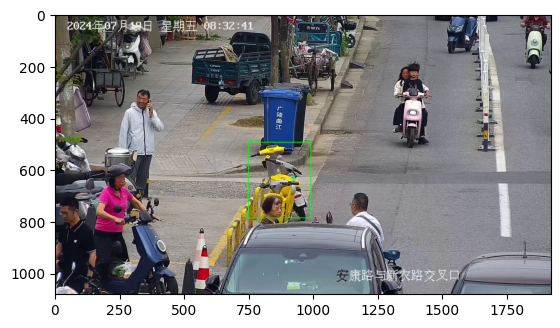

In [9]:
bbox = [746, 494, 988, 786]

pt1 = (bbox[0], bbox[1])
pt2 = (bbox[2], bbox[3])

color = (0, 255, 0) 
thickness = 2  # 线条粗细

cv2.rectangle(frame, pt1, pt2, color, thickness)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

## 数据转换

In [10]:
if not os.path.exists('yolo-dataset/'):
    os.mkdir('yolo-dataset/')
if not os.path.exists('yolo-dataset/train'):
    os.mkdir('yolo-dataset/train')
if not os.path.exists('yolo-dataset/val'):
    os.mkdir('yolo-dataset/val')

dir_path = os.path.abspath('./') + '/'

# 需要按照你的修改path
with open('yolo-dataset/yolo.yaml', 'w', encoding='utf-8') as up:
    up.write(f'''
path: {dir_path}/yolo-dataset/
train: train/
val: val/

names:
    0: 非机动车违停
    1: 机动车违停
    2: 垃圾桶满溢
    3: 违法经营
''')

In [11]:
train_annos = glob.glob('训练集(有标注第一批)/标注/*.json')
train_videos = glob.glob('训练集(有标注第一批)/视频/*.mp4')
train_annos.sort(); train_videos.sort();

category_labels = ["非机动车违停", "机动车违停", "垃圾桶满溢", "违法经营"]

In [12]:
for anno_path, video_path in zip(train_annos[:5], train_videos[:5]):
    print(video_path)
    anno_df = pd.read_json(anno_path)
    cap = cv2.VideoCapture(video_path)
    frame_idx = 0 
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        img_height, img_width = frame.shape[:2]
        
        frame_anno = anno_df[anno_df['frame_id'] == frame_idx]
        cv2.imwrite('./yolo-dataset/train/' + anno_path.split('/')[-1][:-5] + '_' + str(frame_idx) + '.jpg', frame)

        if len(frame_anno) != 0:
            with open('./yolo-dataset/train/' + anno_path.split('/')[-1][:-5] + '_' + str(frame_idx) + '.txt', 'w') as up:
                for category, bbox in zip(frame_anno['category'].values, frame_anno['bbox'].values):
                    category_idx = category_labels.index(category)
                    
                    x_min, y_min, x_max, y_max = bbox
                    x_center = (x_min + x_max) / 2 / img_width
                    y_center = (y_min + y_max) / 2 / img_height
                    width = (x_max - x_min) / img_width
                    height = (y_max - y_min) / img_height

                    if x_center > 1:
                        print(bbox)
                    up.write(f'{category_idx} {x_center} {y_center} {width} {height}\n')
        
        frame_idx += 1

训练集(有标注第一批)/视频/0.mp4
训练集(有标注第一批)/视频/1.mp4
训练集(有标注第一批)/视频/10.mp4
训练集(有标注第一批)/视频/11.mp4
训练集(有标注第一批)/视频/12.mp4


In [13]:
for anno_path, video_path in zip(train_annos[-3:], train_videos[-3:]):
    print(video_path)
    anno_df = pd.read_json(anno_path)
    cap = cv2.VideoCapture(video_path)
    frame_idx = 0 
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        img_height, img_width = frame.shape[:2]
        
        frame_anno = anno_df[anno_df['frame_id'] == frame_idx]
        cv2.imwrite('./yolo-dataset/val/' + anno_path.split('/')[-1][:-5] + '_' + str(frame_idx) + '.jpg', frame)

        if len(frame_anno) != 0:
            with open('./yolo-dataset/val/' + anno_path.split('/')[-1][:-5] + '_' + str(frame_idx) + '.txt', 'w') as up:
                for category, bbox in zip(frame_anno['category'].values, frame_anno['bbox'].values):
                    category_idx = category_labels.index(category)
                    
                    x_min, y_min, x_max, y_max = bbox
                    x_center = (x_min + x_max) / 2 / img_width
                    y_center = (y_min + y_max) / 2 / img_height
                    width = (x_max - x_min) / img_width
                    height = (y_max - y_min) / img_height

                    up.write(f'{category_idx} {x_center} {y_center} {width} {height}\n')
        
        frame_idx += 1

训练集(有标注第一批)/视频/7.mp4
训练集(有标注第一批)/视频/8.mp4
训练集(有标注第一批)/视频/9.mp4


In [14]:
!wget http://mirror.coggle.club/yolo/yolov8n-v8.2.0.pt -O yolov8n.pt

--2024-08-20 16:19:51--  http://mirror.coggle.club/yolo/yolov8n-v8.2.0.pt
Resolving mirror.coggle.club (mirror.coggle.club)... 101.206.244.158, 101.206.244.154, 101.206.244.155, ...
Connecting to mirror.coggle.club (mirror.coggle.club)|101.206.244.158|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6549796 (6.2M) [application/vnd.snesdev-page-table]
Saving to: ‘yolov8n.pt’

yolov8n.pt          100%[===================>]   6.25M  11.4MB/s    in 0.5s    

2024-08-20 16:19:53 (11.4 MB/s) - ‘yolov8n.pt’ saved [6549796/6549796]



In [15]:
!mkdir -p ~/.config/Ultralytics/
!wget http://mirror.coggle.club/yolo/Arial.ttf -O ~/.config/Ultralytics/Arial.ttf

--2024-08-20 16:19:53--  http://mirror.coggle.club/yolo/Arial.ttf
Resolving mirror.coggle.club (mirror.coggle.club)... 101.206.244.156, 101.206.244.158, 101.206.244.157, ...
Connecting to mirror.coggle.club (mirror.coggle.club)|101.206.244.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773236 (755K) [font/ttf]
Saving to: ‘/root/.config/Ultralytics/Arial.ttf’

/root/.config/Ultra 100%[===================>] 755.11K  4.88MB/s    in 0.2s    

2024-08-20 16:19:53 (4.88 MB/s) - ‘/root/.config/Ultralytics/Arial.ttf’ saved [773236/773236]



In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import warnings
warnings.filterwarnings('ignore')


from ultralytics import YOLO
model = YOLO("yolov8n.pt")
results = model.train(data="yolo-dataset/yolo.yaml", epochs=2, imgsz=1080, batch=16)

Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=yolo-dataset/yolo.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=1080, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 22.2M/22.2M [00:00<00:00, 26.8MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    752092  ultralytics.nn.modules.head.Detect           [4, [64, 128, 256]]           
Model summary: 225 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
WARNING ⚠️ imgsz=[1080] must be multiple of max stride 32, updating to [1088]


train: Scanning /root/yolo-dataset/train... 676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 676/676 [00:00<00:00, 1965.12it/s]

train: New cache created: /root/yolo-dataset/train.cache



val: Scanning /root/yolo-dataset/val... 580 images, 3 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<00:00, 2313.73it/s]

val: New cache created: /root/yolo-dataset/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1088 train, 1088 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      6.62G      1.529       3.15      1.241         20       1088: 100%|██████████| 43/43 [00:07<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.76it/s]

                   all        583       6590     0.0225      0.355     0.0576     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      6.25G     0.8006      1.357     0.9097         29       1088: 100%|██████████| 43/43 [00:04<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  9.49it/s]


                   all        583       6590     0.0398      0.547      0.175     0.0802

2 epochs completed in 0.005 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.18it/s]


                   all        583       6590     0.0398      0.546      0.175     0.0801
                非机动车违停        580       2031     0.0215      0.691      0.272      0.102
                 机动车违停        580       3515      0.128      0.678      0.385      0.211
                 垃圾桶满溢        580        580     0.0052      0.334    0.00349    0.00269
                  违法经营        232        464    0.00416      0.483     0.0407    0.00427
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


In [17]:
category_labels = ["非机动车违停", "机动车违停", "垃圾桶满溢", "违法经营"]

if not os.path.exists('result/'):
    os.mkdir('result')

In [21]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")
import glob

for path in glob.glob('测试集/*.mp4'):
    submit_json = []
    results = model(path, conf=0.05, imgsz=1080,  verbose=False)
    for idx, result in enumerate(results):
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs

        if len(boxes.cls) == 0:
            continue
        
        xywh = boxes.xyxy.data.cpu().numpy().round()
        cls = boxes.cls.data.cpu().numpy().round()
        conf = boxes.conf.data.cpu().numpy()
        for i, (ci, xy, confi) in enumerate(zip(cls, xywh, conf)):
            submit_json.append(
                {
                    'frame_id': idx,
                    'event_id': i+1,
                    'category': category_labels[int(ci)],
                    'bbox': list([int(x) for x in xy]),
                    "confidence": float(confi)
                }
            )

    with open('./result/' + path.split('/')[-1][:-4] + '.json', 'w', encoding='utf-8') as up:
        json.dump(submit_json, up, indent=4, ensure_ascii=False)

WARNING ⚠️ imgsz=[1080] must be multiple of max stride 32, updating to [1088]

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

WARNING ⚠️ imgsz=[1080] must be multiple of max stride 32, updating to [1088]

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generat

In [22]:
!\rm result/.ipynb_checkpoints/ -rf
!\rm result.zip
!zip -r result.zip result/

rm: cannot remove 'result.zip': No such file or directory
  adding: result/ (stored 0%)
  adding: result/test_6.json (deflated 94%)
  adding: result/test_38.json (deflated 92%)
  adding: result/test_14.json (deflated 88%)
  adding: result/test_5.json (stored 0%)
  adding: result/test_33.json (deflated 88%)
  adding: result/test_13.json (stored 0%)
  adding: result/test_7.json (deflated 43%)
  adding: result/test_2.json (stored 0%)
  adding: result/test_17.json (deflated 90%)
  adding: result/test_8.json (stored 0%)
  adding: result/test_28.json (deflated 90%)
  adding: result/test_4.json (deflated 83%)
  adding: result/test_24.json (deflated 92%)
  adding: result/test_36.json (deflated 44%)
  adding: result/test_35.json (deflated 89%)
  adding: result/test_27.json (deflated 90%)
  adding: result/test_10.json (stored 0%)
  adding: result/test_32.json (deflated 92%)
  adding: result/test_19.json (stored 0%)
  adding: result/test_15.json (stored 0%)
  adding: result/test_16.json (deflated